In [16]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle 
# to pickle the above scalar while deployment


In [38]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [40]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# df = pd.get_dummies(df, columns=['Geography'], dtype = int, drop_first=True)


In [42]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with drop_first=True
enc = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the 'Geography' column (reshape to 2D for sklearn)
encoded_values = enc.fit_transform(df[['Geography']]).astype(int)

# Convert the encoded values to a DataFrame
df_encoded = pd.DataFrame(encoded_values, columns=enc.get_feature_names_out(['Geography']))

# Display the encoded DataFrame
print(df_encoded)

      Geography_Germany  Geography_Spain
0                     0                0
1                     0                1
2                     0                0
3                     0                0
4                     0                1
...                 ...              ...
9995                  0                0
9996                  0                0
9997                  0                0
9998                  1                0
9999                  0                0

[10000 rows x 2 columns]


In [43]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df.drop(columns = ["Geography"], inplace = True)
df = pd.concat([df, df_encoded], axis = 1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [46]:
# Save the encoder to a pickle file
with open('onehot_encoder_geo.pkl', 'wb') as file:
    pickle.dump(enc, file)

with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(le, file)    

In [47]:
X = df.drop(columns = ['Exited'])
y = df.Exited

In [48]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

### ANN Implementation


In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard


In [56]:
# Build an ANN Model
model = Sequential()
# Add layers one by one using the 'add' method
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # First hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))               # Second hidden layer with 32 neurons
model.add(Dense(1, activation='sigmoid'))             # Output layer for binary classification

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.2)
loss = tensorflow.keras.losses.BinaryCrossentropy

In [64]:
# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [68]:
import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

log_dir = 'logs/fit_' + datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
tensorboard_callback = TensorBoard(log_dir = log_dir, histogram_freq=1)

In [71]:
# set up early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)

In [75]:
# Train the model
history = model.fit(
    X_train, y_train,                # Training data
    epochs=100,                      # Maximum number of epochs
    # batch_size=32,                   # Batch size
    validation_data=(X_test, y_test),  # Validation data
    callbacks=[early_stopping_callback, tensorboard_callback]  # Early stopping and TensorBoard callbacks
)

Epoch 1/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3197 - accuracy: 0.8666 - val_loss: 0.3385 - val_accuracy: 0.8610
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3178 - accuracy: 0.8692 - val_loss: 0.3397 - val_accuracy: 0.8600
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.8680 - val_loss: 0.3420 - val_accuracy: 0.8565
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3159 - accuracy: 0.8705 - val_loss: 0.3405 - val_accuracy: 0.8620
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3146 - accuracy: 0.8694 - val_loss: 0.3382 - val_accuracy: 0.8625
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.8731 - val_loss: 0.3411 - val_accuracy: 0.8640
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3123 - accuracy: 0.8731 - val_loss: 0.3412 - val_accuracy: 0.8565

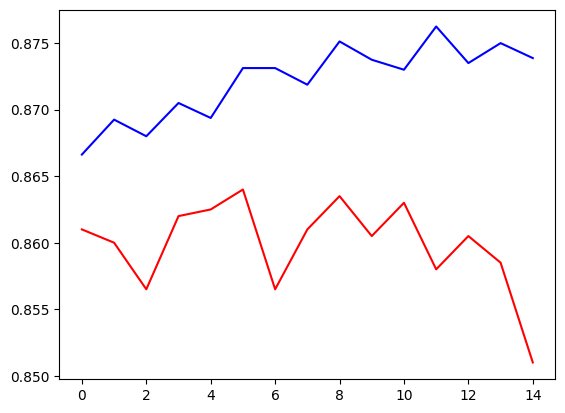

In [77]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(train_acc, color='blue')
plt.plot(val_acc, color='red')
plt.show()

In [79]:
# save the model file
model.save('model.h5')


c:\Users\arsha\Downloads\Deep Learning\ANN_Classification\myenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [83]:
# Load TensorBoard Extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [85]:
%tensorboard --logdir logs/fit_2024-11-14_07-42-35

Reusing TensorBoard on port 6007 (pid 16996), started 0:03:21 ago. (Use '!kill 16996' to kill it.)

In [ ]:
clear

In [ ]:
# Load the pickle file
